<a href="https://colab.research.google.com/github/chanyongp/repository/blob/main/%EC%A7%80%EA%B5%AC%EA%B3%BC%ED%95%99_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/var_data/
import numpy as np
test=np.load('nino34.npy',encoding='latin1')
print(test)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!git clone https://github.com/ZiluM/Deep-learning-for-multi-year-ENSO-Reproduction.git

In [3]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

In [4]:
import sys
sys.path.append("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/main")
from load_data import load_var, load_spmonth, load_train

In [18]:
#load_data
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import os

path="/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/var_data"
def load_var(path, ip_len, op_len):
    ip_data_ls = []
    op_data_ls = []
    ip_data_ls1 = []
    sst = np.load(path + "/sst.npy")
    ssh = np.load(path + "/ssh.npy")
    nino34 = np.load(path + "/nino34.npy")
    print("data_shape:",sst.shape,ssh.shape,nino34.shape)
    for i in range(ip_len):
        idr = -ip_len + i + 1 - op_len if -ip_len + i + 1 - op_len != 0 else None
        ip_data_sst = sst[i:idr][:, :, :, np.newaxis]
        ip_data_ssh = ssh[i:idr][:, :, :, np.newaxis]
        ip_data_ls.append(ip_data_sst)
        ip_data_ls1.append(ip_data_ssh)
    for j in range(op_len):
        idl = j + ip_len
        idr = -op_len + j + 1 if -op_len + j + 1 != 0 else None
        op_data = nino34[idl:idr][:, np.newaxis]
        op_data_ls.append(op_data)
    ip_data_ls = np.concatenate(ip_data_ls, axis=3)
    ip_data_ls1 = np.concatenate(ip_data_ls1, axis=3)
    op_data_ls = np.concatenate(op_data_ls, axis=1)
    return ip_data_ls, ip_data_ls1, op_data_ls


ip_data_ls,ip_data_ls1, op_data_ls = load_var("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/var_data", 3, 20)
ip_data_ls.shape, op_data_ls.shape,ip_data_ls1.shape

import numpy as np
import pandas as pd
month_idx =  pd.date_range("1900-02-01","1930-12-30",freq="MS")
month_idx
ip_len=3
op_len=13
nino_month=1

ip_st_month = (nino_month - op_len - ip_len)%12 + 1
# 9 10 11
ip_st_month

ip_st_idx = ip_st_month - 2
ip_st_idx

month_idx[ip_st_idx:ip_st_idx+ip_len]

month_idx[ip_st_idx+ip_len+op_len-1]

# for idx in range(month_idx.shape[0]):
idx_begin = 9 -2
idx_nino1 = idx_begin + op_len + 3
month_idx[idx_begin],month_idx[idx_nino1]
idx_begin2 = idx_begin + 12
idx_nino2 = idx_nino1 + 12

month_idx[idx_begin2],month_idx[idx_nino2]

# month_idx =  pd.date_range("1850-01-01","2014-11-30",freq="MS")
month_idx =  pd.date_range("1850-01-01","1889-11-30",freq="MS")
def load_data(ip_len=3, op_len=13, nino_month=1, label="noVar"):
    if label == "noVar":
        bg_month = 2
    else:
        bg_month = 1
    ip_st_month = (nino_month - op_len - ip_len) % 12 + 1
    idx_begin = ip_st_month - bg_month
    nino_idx_begin = idx_begin + ip_len + op_len -1
    N = month_idx.shape[0]
    gap_year = np.abs((nino_month - op_len - ip_len) // 12)
    ip_data_ls = []
    op_data_ls = month_idx[nino_idx_begin::12]
    # print(gap_year)
    for eh in range(ip_len):
        ip_data = month_idx[idx_begin+eh::12]
        diff_len = ip_data.shape[0] - op_data_ls.shape[0]
        print(diff_len)
        if diff_len != 0:
            ip_data = ip_data[:-diff_len]
        print(ip_data.shape)
        ip_data_ls.append(ip_data[...,np.newaxis])
    ip_data_ls = np.concatenate(ip_data_ls,axis=-1)
    print(op_data_ls)
    return ip_data_ls,op_data_ls
ip_data_ls,op_data_ls = load_data()
print(ip_data_ls[-1],op_data_ls[-1])
print(ip_data_ls.shape,op_data_ls.shape)
# print(month_idx)

month_idx =  pd.date_range("1850-01-01","1889-11-30",freq="MS")
month_idx


data_shape: (479, 24, 72) (479, 24, 72) (479,)
2
(38,)
2
(38,)
2
(38,)
DatetimeIndex(['1851-12-01', '1852-12-01', '1853-12-01', '1854-12-01',
               '1855-12-01', '1856-12-01', '1857-12-01', '1858-12-01',
               '1859-12-01', '1860-12-01', '1861-12-01', '1862-12-01',
               '1863-12-01', '1864-12-01', '1865-12-01', '1866-12-01',
               '1867-12-01', '1868-12-01', '1869-12-01', '1870-12-01',
               '1871-12-01', '1872-12-01', '1873-12-01', '1874-12-01',
               '1875-12-01', '1876-12-01', '1877-12-01', '1878-12-01',
               '1879-12-01', '1880-12-01', '1881-12-01', '1882-12-01',
               '1883-12-01', '1884-12-01', '1885-12-01', '1886-12-01',
               '1887-12-01', '1888-12-01'],
              dtype='datetime64[ns]', freq='12MS')
['1887-09-01T00:00:00.000000000' '1887-10-01T00:00:00.000000000'
 '1887-11-01T00:00:00.000000000'] 1888-12-01 00:00:00
(38, 3) (38,)


<ipython-input-18-c2b2e1cc89e5>:121: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ip_data_ls.append(ip_data[...,np.newaxis])


DatetimeIndex(['1850-01-01', '1850-02-01', '1850-03-01', '1850-04-01',
               '1850-05-01', '1850-06-01', '1850-07-01', '1850-08-01',
               '1850-09-01', '1850-10-01',
               ...
               '1889-02-01', '1889-03-01', '1889-04-01', '1889-05-01',
               '1889-06-01', '1889-07-01', '1889-08-01', '1889-09-01',
               '1889-10-01', '1889-11-01'],
              dtype='datetime64[ns]', length=479, freq='MS')

2.12.0
ACCESS-CM2 data_shape: (1978, 24, 72) (1978, 24, 72) (1978,)
CESM2 data_shape: (1978, 24, 72) (1978, 24, 72) (1978,)
CCSM4 data_shape: (1870, 24, 72) (1870, 24, 72) (1870,)
CESM1-CAM5 data_shape: (1870, 24, 72) (1870, 24, 72) (1870,)
CMCC-CMS data_shape: (1870, 24, 72) (1870, 24, 72) (1870,)
CNRM-CM5 data_shape: (1870, 24, 72) (1870, 24, 72) (1870,)
CMCC-CM data_shape: (1870, 24, 72) (1870, 24, 72) (1870,)
CMCC-CESM data_shape: (1870, 24, 72) (1870, 24, 72) (1870,)
CNRM-CM6-1 data_shape: (1978, 24, 72) (1978, 24, 72) (1978,)
CSIRO-Mk3-6-0 data_shape: (1870, 24, 72) (1870, 24, 72) (1870,)
CanESM2 data_shape: (1870, 24, 72) (1870, 24, 72) (1870,)
FGOALS-f3-L data_shape: (1978, 24, 72) (1978, 24, 72) (1978,)
FGOALS-g3 data_shape: (1978, 24, 72) (1978, 24, 72) (1978,)
GFDL-CM4 data_shape: (1978, 24, 72) (1978, 24, 72) (1978,)
FIO-ESM data_shape: (1870, 24, 72) (1870, 24, 72) (1870,)
MPI-ESM-LR data_shape: (1870, 24, 72) (1870, 24, 72) (1870,)
MIROC5 data_shape: (1954, 24, 72) (1954,

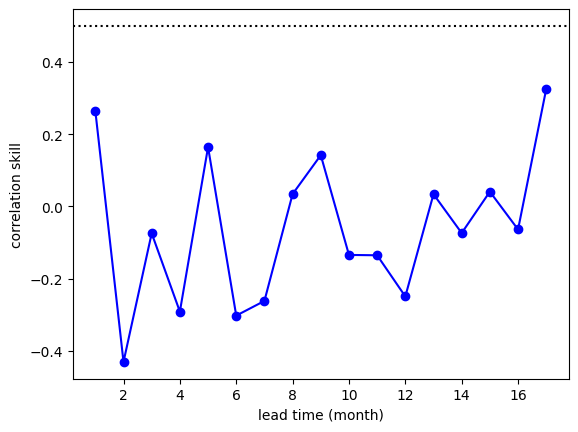

In [54]:
#Network
#!/usr/bin/env python
# coding: utf-8

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import load_data as ld
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras import datasets, layers, models

print(tf.__version__)


sst_train, ssh_train, nino34_train = ld.load_train("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/train_data", op_len=17, with_obs=True)
obs_sst_train, obs_ssh_train, obs_nino34_train = ld.load_var("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/train_data/obs", op_len=17)

sst_var, ssh_var, nino34_var = ld.load_var("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/var_data", op_len=17)

# 标准化
sst_std = sst_train.std()
ssh_std = ssh_train.std()
nino34_std = nino34_train.std()
print(sst_std, ssh_std, nino34_std)
sst_train, ssh_train, nino34_train = sst_train / sst_std, ssh_train / ssh_std, nino34_train / nino34_std
obs_sst_train, obs_ssh_train, obs_nino34_train = obs_sst_train / sst_std, obs_ssh_train / ssh_std, obs_nino34_train / nino34_std
sst_var, ssh_var, nino34_var = sst_var / sst_std, ssh_var / ssh_std, nino34_var / nino34_std

ip_var = np.concatenate([sst_var, ssh_var], axis=3)
ip_train = np.concatenate([sst_train, ssh_train], axis=3)
obs_ip_train = np.concatenate([obs_sst_train, obs_ssh_train], axis=3)
ip_train.shape, ip_var.shape

True in np.isnan(ip_train)

nino34_train.shape

# shuffle
ip_train, nino34_train = shuffle(ip_train, nino34_train)
obs_sst_train , obs_nino34_train = shuffle(obs_sst_train , obs_nino34_train)

model = models.Sequential(name="ENSO")
model.add(layers.Conv2D(50, (4, 8), activation="tanh", padding="same", input_shape=ip_train.shape[1:]))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(50, (4, 8), activation="tanh", padding="same"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(50, (4, 8), activation="tanh", padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation="tanh"))
model.add(layers.Dense(17))
model.summary()

"""
# Pre-train with Model Data
model.compile(optimizer=keras.optimizers.SGD(), loss="mse")
hist = model.fit(ip_train, nino34_train, validation_data=(ip_var, nino34_var), epochs=20, batch_size=400)
model.save("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/model/exp2_pretrain")


# In[70]:


 # after training
model1 = keras.models.load_model("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/model/exp2_pretrain")
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-6), loss="mse")
hist1 = model1.fit(obs_ip_train, obs_nino34_train, validation_data=(ip_var, nino34_var), epochs=5, batch_size=30)
model1.save("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/model/exp2_aftertrain")


# In[20]:


def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig('/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/pic/train_prog_all_net.png', dpi=300)
    plt.show()


visualize_loss(hist, "Training and Validation Loss")


# In[72]:


def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig('/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/pic/train_prog.png', dpi=300)
    plt.show()


visualize_loss(hist1, "Training and Validation Loss")
"""

In [ ]:

pre_nino = model.predict(ip_var)
pre_nino.shape, nino34_var.shape


# In[18]:


import scipy.stats as sts

corr_ls = []
for i in range(17):
    corr, _ = sts.pearsonr(pre_nino[:,i], nino34_var[:,i])
# corr
    corr_ls.append(corr)
plt.plot(np.arange(1, 18), corr_ls, "o-", color="blue")
plt.xlabel("lead time (month)")
plt.ylabel("correlation skill")
plt.axhline(0.5, color="k", linestyle=":")
plt.savefig("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/pic/all_net_corr_skill.png")



(460, 24, 72, 6)

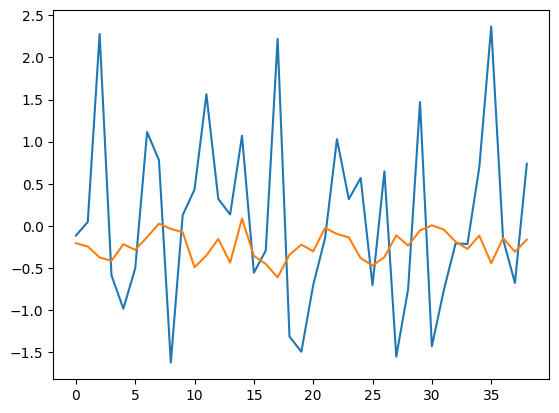

In [53]:

# In[15]:


plt.plot(nino34_var[::12,9])
plt.plot(pre_nino[::12,9])


# In[ ]:


np.save("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/all_net_ip_data",ip_var[::12])
np.save("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/all_net_out_data",nino34_var[::12])


# In[16]:


ip_var.shape

In [ ]:
!pip install cartopy
!pip install tensorflow

2.12.0
1/1 [==============================] - 0s 139ms/step
DatetimeIndex(['1988-04-01', '1988-05-01', '1988-06-01', '1988-07-01',
               '1988-08-01', '1988-09-01', '1988-10-01', '1988-11-01',
               '1988-12-01', '1989-01-01', '1989-02-01', '1989-03-01',
               '1989-04-01', '1989-05-01', '1989-06-01', '1989-07-01',
               '1989-08-01'],
              dtype='datetime64[ns]', freq='MS')


ValueError: ignored

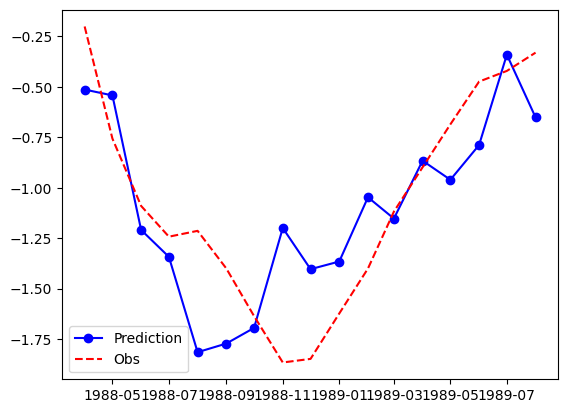

In [19]:
#heatmap_allnet -> 작동시키면 다운됨...?
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import load_data as ld
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras import datasets, layers, models
print(tf.__version__)


# In[2]:


ip_data = np.load("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/all_net_ip_data.npy")
out_data = np.load("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/all_net_out_data.npy")
ip_data.shape,out_data.shape


# In[3]:


model = keras.models.load_model("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/model/exp2_pretrain")


# In[4]:


pre_data = model.predict(ip_data[[8]])


# In[5]:


pre_data


# In[8]:


out_data[8,:]


# In[9]:


import pandas as pd
#plt.rc('font', family='Times New Roman')
time0 = pd.date_range("1988-04-01","1989-08-15",freq="MS")
print(time0)
plt.plot(time0,pre_data[0],"o-",color="blue",label="Prediction")
plt.plot(time0,out_data[8],"--",color="red",label="Obs")
plt.legend()
plt.savefig("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/pic/1988_la.png")


# In[10]:


last_conv_layer_name = "conv2d_2"
grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
)
grad_model.summary()


# In[11]:


with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(ip_data[[8]])
    class_channel = preds[:,9]
grads = tape.gradient(class_channel, last_conv_layer_output)
grads.shape,preds.shape


# In[12]:


pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
# pooled_grads = grads
pooled_grads.shape


# In[13]:


last_conv_layer_output = last_conv_layer_output[0]
last_conv_layer_output.shape


# In[14]:


heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]


# In[15]:


heatmap = tf.squeeze(heatmap)


# In[16]:


plt.pcolor(heatmap,cmap="Reds")
plt.colorbar()


# In[17]:


lon = np.arange(0,356,5,dtype=float)
lat = np.arange(-55,61,5,dtype=float)


# In[18]:


LON,LAT = np.meshgrid(lon,lat)


# In[19]:


map_fun = keras.layers.AveragePooling2D((2,2))


# In[20]:


lat1 = map_fun(map_fun(LAT[np.newaxis,:,:,np.newaxis]))[0,:,:,0]
lon1 = map_fun(map_fun(LON[np.newaxis,:,:,np.newaxis]))[0,:,:,0]


# In[22]:


from tensorflow.python.ops.numpy_ops import np_config
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cft
np_config.enable_numpy_behavior()
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(lon1,lat1,heatmap,cmap="RdBu_r",
    transform=ccrs.PlateCarree(),levels=np.linspace(-0.01,0.01,13),
    extend="both")
plt.colorbar(m)
ax.set_aspect("auto")
ax.coastlines()
ax.add_feature(cft.LAND,color="gray",zorder=10)
ax.gridlines(draw_labels=True)


# In[23]:


np.save("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/lon1",lon1)
np.save("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/lat1",lat1)
np.save("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/1988lanina2",heatmap)


# In[24]:


model.layers[-1].get_weights()[-1][6]


# In[ ]:






사전준비 끝

In [12]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf


model = models.Sequential(name="ENSO")
model.add(layers.Conv2D(50, (4, 8), activation="tanh", padding="same", input_shape=ip_train.shape[1:]))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(50, (4, 8), activation="tanh", padding="same"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(50, (4, 8), activation="tanh", padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation="tanh"))
model.add(layers.Dense(17))
model.summary()


Model: "ENSO"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 72, 50)        9650      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 36, 50)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 36, 50)        80050     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 18, 50)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 18, 50)         80050     
                                                                 
 flatten_2 (Flatten)         (None, 5400)              0      

In [13]:
model.compile(optimizer=keras.optimizers.SGD(), loss="mse")
hist = model.fit(ip_train, nino34_train, validation_data=(ip_var, nino34_var), epochs=20, batch_size=400)
model.save("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/model/exp2_pretrain")


Epoch 1/20
108/108 [==============================] - 603s 6s/step - loss: 0.6564 - val_loss: 0.4781
Epoch 2/20
108/108 [==============================] - 601s 6s/step - loss: 0.5193 - val_loss: 0.5003
Epoch 3/20
108/108 [==============================] - 600s 6s/step - loss: 0.4869 - val_loss: 0.4543
Epoch 4/20
108/108 [==============================] - 602s 6s/step - loss: 0.4684 - val_loss: 0.4455
Epoch 5/20
108/108 [==============================] - 604s 6s/step - loss: 0.4550 - val_loss: 0.4661
Epoch 6/20
108/108 [==============================] - 603s 6s/step - loss: 0.4442 - val_loss: 0.4491
Epoch 7/20
108/108 [==============================] - 604s 6s/step - loss: 0.4350 - val_loss: 0.5345
Epoch 8/20
108/108 [==============================] - 603s 6s/step - loss: 0.4267 - val_loss: 0.5109
Epoch 9/20
108/108 [==============================] - 600s 6s/step - loss: 0.4193 - val_loss: 0.4492
Epoch 10/20
108/108 [==============================] - 602s 6s/step - loss: 0.4122 - val_lo

2.12.0
1/1 [==============================] - 0s 140ms/step
DatetimeIndex(['2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01'],
              dtype='datetime64[ns]', freq='MS')


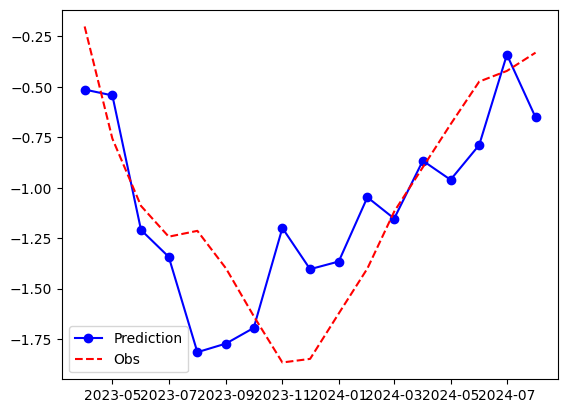

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import load_data as ld
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras import datasets, layers, models
print(tf.__version__)

ip_data = np.load("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/all_net_ip_data.npy")
out_data = np.load("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/all_net_out_data.npy")
ip_data.shape,out_data.shape

model = keras.models.load_model("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/model/exp2_pretrain")
pre_data = model.predict(ip_data[[8]])
pre_data

out_data[8,:]

import pandas as pd
#plt.rc('font', family='Times New Roman')
time0 = pd.date_range("2023-04-01","2024-08-15",freq="MS")
print(time0)
plt.plot(time0,pre_data[0],"o-",color="blue",label="Prediction")
plt.plot(time0,out_data[8],"--",color="red",label="Obs")
plt.legend()


In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()


# load model
model = keras.models.load_model("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/model/exp2_pretrain") 
# build model to get heatmap
last_conv_layer_name = "conv2d_7" # 最后一层卷积层的名字
grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
)
grad_model.summary()

# get gradient
with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(ip_data[[8]])
    class_channel = preds[:,9] # Here, 9 is the last output channel. We want to calculate the nino3.4 index of the tenth month, so we use [:, 9]
# differentiate
grads = tape.gradient(class_channel, last_conv_layer_output)
# global  average  pooling
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
# calculate 
last_conv_layer_output = last_conv_layer_output[0]
# Weight * feature graph and sum
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)
# absolute
heatmap = np.abs(heatmap)
# normalize
heatmap = heatmap/heatmap.max()
"""
plt.pcolor(heatmap,cmap="Reds")
plt.colorbar()"""

lon = np.arange(0,356,5,dtype=float)
lat = np.arange(-55,61,5,dtype=float)

LON,LAT = np.meshgrid(lon,lat)

map_fun = keras.layers.AveragePooling2D((2,2))

lat1 = map_fun(map_fun(LAT[np.newaxis,:,:,np.newaxis]))[0,:,:,0]
lon1 = map_fun(map_fun(LON[np.newaxis,:,:,np.newaxis]))[0,:,:,0]

from tensorflow.python.ops.numpy_ops import np_config
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cft
np_config.enable_numpy_behavior()
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(lon1,lat1,heatmap,cmap="RdBu_r",
    transform=ccrs.PlateCarree(),levels=np.linspace(-0.01,0.01,13),
    extend="both")
plt.colorbar(m)
ax.set_aspect("auto")
ax.coastlines()
ax.add_feature(cft.LAND,color="gray",zorder=10)
ax.gridlines(draw_labels=True)


2.12.0
1/1 [==============================] - 0s 266ms/step
var_data data_shape: (479, 24, 72) (479, 24, 72) (479,)
15/15 [==============================] - 3s 180ms/step


(1, 24, 72, 6)

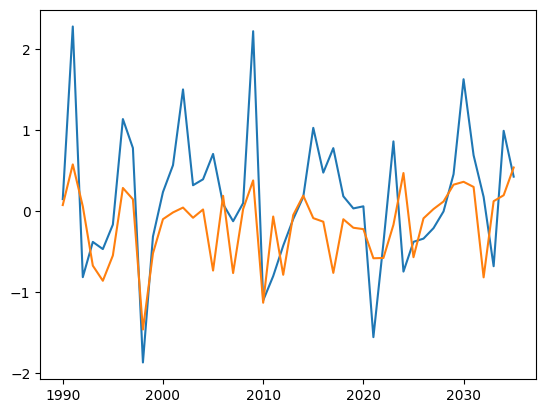

In [50]:
#!/usr/bin/env python
# coding: utf-8

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import load_data as ld
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras import datasets, layers, models

print(tf.__version__)

sst = np.load("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/98sst.npy")
ssh = np.load("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/98ssh.npy")
sst = sst / 0.6260731
ssh = ssh / 0.033900216

model = keras.models.load_model("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/model/exp1_pretrain_op1_2")

ip_data = np.concatenate([sst, ssh])[np.newaxis, ...]
ip_data = np.transpose(ip_data, axes=[0, 2, 3, 1])
ip_data.shape

model.predict(ip_data)

np.load("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/htmp_data/98nino34.npy")

sst_var, ssh_var, nino34_var = ld.load_var("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/var_data", op_len=13, out_put_one=True)
sst_std = 0.6260731
ssh_std = 0.033900216
nino34_std = 0.9931435
sst_var, ssh_var, nino34_var = sst_var / sst_std, ssh_var / ssh_std, nino34_var / nino34_std

ip_var = np.concatenate([sst_var, ssh_var], axis=3)

predict_nino = model.predict(ip_var)

import pandas as np
predict_nino.shape

predict_nino[11::12]

djf_diff = nino34_var[11::12] - predict_nino[11::12,0]

import numpy as np
time = np.arange(1990,2036)
plt.plot(time,nino34_var[11::10])
plt.plot(time,predict_nino[11::10,0])

time[7],nino34_var[11::10][7],predict_nino[11::10,0][7]

# np.save(ip_var[])
np.save("/content/drive/MyDrive/Deep-learning-for-multi-year-ENSO-Reproduction/data/1988_lanina_ip",ip_var[11::10][[7]])
ip_var[11::10][[7]].shape

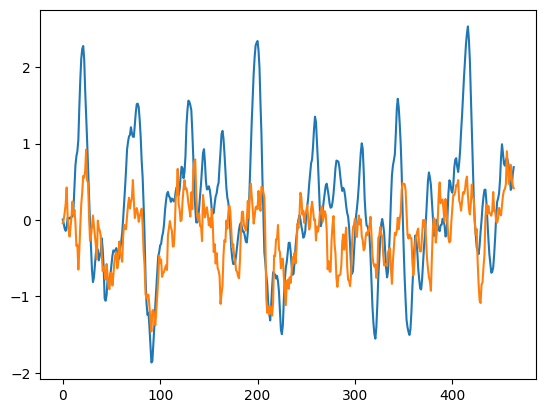

In [51]:
plt.plot(nino34_var)
plt.plot(predict_nino)

#https://zhuanlan.zhihu.com/p/435606727
참조함

In [7]:
!pip install wget
import wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=5ce7a9c8cf5c9b0795955971c8b49574fd4532bf6be629fdd68083be9579f437
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:

ini = r"https://esgdata.gfdl.noaa.gov/thredds/fileServer/gfdl_dataroot4/CMIP/" + \
      r"NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/%s/gr/v20190726/%s_Omon_GFDL-ESM4_historical_r1i1p1f1_gr_%s-%s.nc"
#
for var in ["tos", "zos"]:
    for year in range(1850, 2019, 20):
        time1 = str(year) + str(0) + str(1)
        time2 = str(year + 19) + str(12)
        NeedUrl = ini % (var, var, time1, time2)
        print(NeedUrl)
        fileName = "GFDL-ESM4_%s_%s-%s.nc" % (var, time1, time2)
        print(fileName)
        wget.download(NeedUrl, './drive/MyDrive/' + fileName)
        #wget.download(NeedUrl)

https://esgdata.gfdl.noaa.gov/thredds/fileServer/gfdl_dataroot4/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/tos/gr/v20190726/tos_Omon_GFDL-ESM4_historical_r1i1p1f1_gr_185001-186912.nc
GFDL-ESM4_tos_185001-186912.nc
https://esgdata.gfdl.noaa.gov/thredds/fileServer/gfdl_dataroot4/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/tos/gr/v20190726/tos_Omon_GFDL-ESM4_historical_r1i1p1f1_gr_187001-188912.nc
GFDL-ESM4_tos_187001-188912.nc
https://esgdata.gfdl.noaa.gov/thredds/fileServer/gfdl_dataroot4/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/tos/gr/v20190726/tos_Omon_GFDL-ESM4_historical_r1i1p1f1_gr_189001-190912.nc
GFDL-ESM4_tos_189001-190912.nc
https://esgdata.gfdl.noaa.gov/thredds/fileServer/gfdl_dataroot4/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/tos/gr/v20190726/tos_Omon_GFDL-ESM4_historical_r1i1p1f1_gr_191001-192912.nc
GFDL-ESM4_tos_191001-192912.nc
https://esgdata.gfdl.noaa.gov/thredds/fileServer/gfdl_dataroot4/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/to

HTTPError: ignored

In [ ]:
!pip install cftime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.5 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# 下载的CMIP6位置
loc = "./drive/MyDrive/earth"

# 使用 xarray 把分散的几个文件merge起来
FileList = os.listdir(loc)
Toslist = []
Zoslist = []
for FName in FileList:
    ModeName, varName = FName.split("_")[0:2]
    if ModeName == "GFDL-ESM4":
        if varName == "tos":
            Toslist.append(xr.open_dataset(loc + '/' + FName)["tos"])
        else:
            Zoslist.append(xr.open_dataset(loc + '/' + FName)["zos"])


# 把这两个聚合在一起，形成一个大的Data array
TosArray = xr.concat(Toslist, dim=" time")
ZosArray = xr.concat(Zoslist, dim=" time")
# 更改时间 , 需要统一时间，方便后期使用。
TimeRange = pd.date_range(start="18500101", end="20091201", freq="MS")
TosArray["time"] = TimeRange
ZosArray["time"] = TimeRange
# 获得Nino3.4区温区 tos 为 sst

TosA = TosArray.groupby("time.month") - TosArray.groupby("time.month").mean()
Nino34I = TosA.loc[:, -5:5, 190:240].mean(dim=["lat", "lon"])
# 计算3月滑动平均
Nino34I = Nino34I.rolling(time=3, center=True).mean()

# 插值成需要的网格
lat = np.arange(-55, 60.1, 5, )
lon = np.arange(0, 360, 5)
TosInterped = TosArray.interp(lat=lat, lon=lon)
ZosInterped = ZosArray.interp(lat=lat, lon=lon)
# 计算异常值
TosAInterped = TosInterped.groupby("time.month") - TosInterped.groupby("time.month").mean()
ZosAInterped = ZosInterped.groupby("time.month") - ZosInterped.groupby("time.month").mean()
# 保存，用于训练
Nino34ID = xr.Dataset({"Nino34I": Nino34I})
Nino34ID.to_netcdf("./TrainData/Cmip6Nino34I.nc")

TosAD = xr.Dataset({"TosA": TosAInterped})
ZosAD = xr.Dataset({"ZosA": ZosAInterped})
TosAD.to_netcdf("./TrainData/TosA.nc")
ZosAD.to_netcdf("./TrainData/ZosA.nc")

[]


'\n# 把这两个聚合在一起，形成一个大的Data array\nTosArray = xr.concat(Toslist, dim=" time")\nZosArray = xr.concat(Zoslist, dim=" time")\n# 更改时间 , 需要统一时间，方便后期使用。\nTimeRange = pd.date_range(start="18500101", end="20091201", freq="MS")\nTosArray["time"] = TimeRange\nZosArray["time"] = TimeRange\n# 获得Nino3.4区温区 tos 为 sst\n\nTosA = TosArray.groupby("time.month") - TosArray.groupby("time.month").mean()\nNino34I = TosA.loc[:, -5:5, 190:240].mean(dim=["lat", "lon"])\n# 计算3月滑动平均\nNino34I = Nino34I.rolling(time=3, center=True).mean()\n\n# 插值成需要的网格\nlat = np.arange(-55, 60.1, 5, )\nlon = np.arange(0, 360, 5)\nTosInterped = TosArray.interp(lat=lat, lon=lon)\nZosInterped = ZosArray.interp(lat=lat, lon=lon)\n# 计算异常值\nTosAInterped = TosInterped.groupby("time.month") - TosInterped.groupby("time.month").mean()\nZosAInterped = ZosInterped.groupby("time.month") - ZosInterped.groupby("time.month").mean()\n# 保存，用于训练\nNino34ID = xr.Dataset({"Nino34I": Nino34I})\nNino34ID.to_netcdf("./TrainData/Cmip6Nino34I.nc")\n\nTosAD = 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import wget

for year in range(1870, 2020):
    for month in range(1, 13):
        month = str(month).zfill(2)
        url = "https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf/ersst.v5.{}{}.nc".format(year, month)
        file = wget.download(url, out=r"drive/MyDrive/earth/ersstv5D")
        print(file)


drive/MyDrive/earth/ersstv5D


ValueError: ignored

In [ ]:
import xarray as xr
import os
import pandas as pd

fileLoc = "./ersstv5D"
fList = os.listdir(fileLoc)

# 对下载的nc文件进行合并
ncList = []
for FileName in fList:
    nc = xr.open_dataset(fileLoc + r"/" + FileName)["sst"]
    ncList.append(nc)
# 使用 concat 进行合并，不过会很慢
sst1 = xr.concat(ncList, dim="time")
# print(sst1)
# print(sst1.shape)
# 画出来看看
# sst1[100].plot()
# plt.show()

# 统一时间格式并保存
Time = pd.date_range(start="18700101", end="20191201", freq="MS")
sst1["time"] = Time
print(sst1)

SstSave = xr.Dataset({"sst": sst1})
SstSave.to_netcdf("ersstMerge.nc")

In [ ]:
import wget

ini = "ftp://ftp2.psl.noaa.gov/Datasets/godas/sshg.%s.nc"
for year in range(1980, 2020):
    file = wget.download(ini % year, "./GODAS/GODAS%sSSH.nc" % year)
    print(file)

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

Dirloc = "./GODAS"
DirList = os.listdir(Dirloc)
GODASL = []
for loc in DirList:
    Rloc = Dirloc + "/" + loc
    SSH = xr.open_dataset(Rloc)["sshg"]
    GODASL.append(SSH)

SSH = xr.concat(GODASL, dim="time")
Time = pd.date_range("19800101", "20191230", freq="MS")
SSH["time"] = Time

lat = np.arange(-55, 60.1, 5)
lon = np.arange(0, 360, 5)

SSH = SSH.interp(lat=lat, lon=lon)
SSHA = SSH.groupby("time.month") - SSH.groupby("time.month").mean()

SSHADataset = xr.Dataset({"ssha": SSHA})
SSHADataset.to_netcdf("./ValidationData/GODASssha.nc")

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fLoc = r"./soda/ssh.nc"
ssh = xr.open_dataset(fLoc, decode_times=False)["ssh"]
print(ssh)
# 统一时间
ssh["time"] = pd.date_range("18710101", "20081201", freq="MS")

# 出来看看
print(ssh)
ssh[100].plot()
plt.show()

# 插值到文章需要的格式
lat = np.arange(-55, 60.1, 5)
lon = np.arange(0, 360, 5)
ssh1 = ssh.interp(lat=lat, lon=lon, method="linear")
ssh1[100].plot()
plt.show()
print(ssh1)

# 计算距平值
ssha = ssh1.groupby("time.month") - ssh1.groupby("time.month").mean()
ssha[100].plot()
plt.show()

# 保存数据
sshaD = xr.Dataset({"ssha": ssha})
sshaD.to_netcdf("./TrainData/SODAssha.nc")